In [6]:
import sys
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
sys.path.append('/home/ardelalegre/SoundMapping/Database')
from DatabaseAPI import DatabaseAPI
import numpy as np
import matplotlib.pyplot as plt
from get_time_interval_data import *
from PCA import *
from Plot import *
import pickle
from sklearn.cluster import KMeans

In [13]:
chair2_03 = get_time_interval_matrix_data("Nov 3 2020 04:00PM", "Nov 3 2020 04:04PM")
chair3_03 = get_time_interval_matrix_data("Nov 3 2020 04:05PM", "Nov 3 2020 04:09PM")
chair4_03 = get_time_interval_matrix_data("Nov 3 2020 04:10PM", "Nov 3 2020 04:14PM")
chair5_03 = get_time_interval_matrix_data("Nov 3 2020 04:15PM", "Nov 3 2020 04:19PM")
chair1_03 = get_time_interval_matrix_data("Nov 3 2020 04:20PM", "Nov 3 2020 04:24PM")
static_point_data_03 = np.vstack([chair2_03, chair3_03, chair4_03, chair5_03, chair1_03])
static_point_cdata_03 = get_cdata(static_point_data_03)
projections_03 = project_to_eigen_vectors(static_point_cdata_03, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

In [15]:
chair2_20 = get_time_interval_matrix_data('Nov 20 2020 03:50PM', 'Nov 20 2020 03:54PM')
chair3_20 = get_time_interval_matrix_data('Nov 20 2020 03:55PM', 'Nov 20 2020 03:59PM')
chair4_20 = get_time_interval_matrix_data('Nov 20 2020 04:00PM', 'Nov 20 2020 04:04PM')
chair5_20 = get_time_interval_matrix_data('Nov 20 2020 04:05PM', 'Nov 20 2020 04:09PM')
chair1_20 = get_time_interval_matrix_data('Nov 20 2020 04:15PM', 'Nov 20 2020 04:19PM')
static_point_data_20 = np.vstack([chair2_20, chair3_20, chair4_20, chair5_20, chair1_20])
static_point_cdata_20 = get_cdata(static_point_data_20)
projections_20 = project_to_eigen_vectors(static_point_cdata_20, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

In [16]:
static_point_data_merged = np.vstack([chair2_03, chair3_20, chair4_20, chair5_20, chair1_20])
static_point_cdata_merged = get_cdata(static_point_data_merged)
projections_merged = project_to_eigen_vectors(static_point_cdata_merged, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

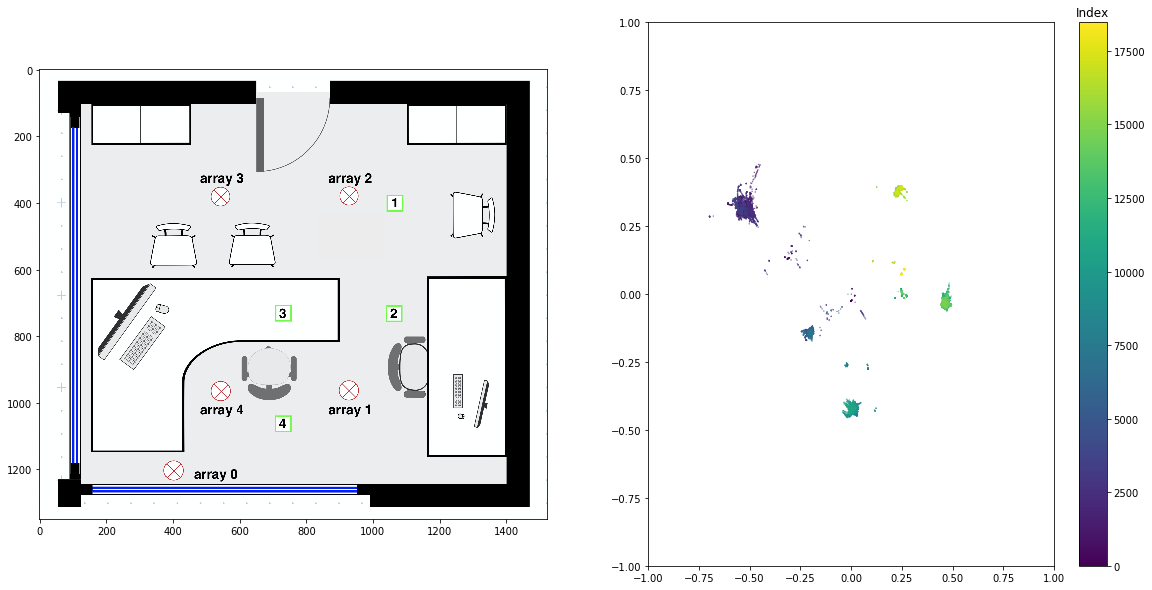

In [18]:
fig = plt.figure(figsize = [20,10])
# ax = fig.add_subplot(121)
# temp = ax.scatter(projections_20[:,0], projections_20[:,1], c = np.arange(projections_20.shape[0]), s=0.1)
# ax.set_xlim(-1,1)
# ax.set_ylim(-1,1)
# cbar = fig.colorbar(temp, ax=ax)
# cbar.ax.set_title('Index')

# ax = fig.add_subplot(122)
# temp = ax.scatter(projections_03[:,0], projections_03[:,1], c = np.arange(projections_03.shape[0]), s=0.1)
# ax.set_xlim(-1,1)
# ax.set_ylim(-1,1)
# cbar = fig.colorbar(temp, ax=ax)
# cbar.ax.set_title('Index')

ax = fig.add_subplot(122)
temp = ax.scatter(projections_merged[:,0], projections_merged[:,1], c = np.arange(projections_merged.shape[0]), s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

ax2 = fig.add_subplot(121)
room_model_chair = mpimg.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

Strange: 2 clusters where there is supposed to be 1  
We will plot just those five minutes

In [ ]:
# plot just those 5 minutes

def slice_interval_indices(data, start_timestring, end_timestring):
    
    format_timestring = '%b %d %Y %I:%M:%S%p' # setting format of input time
    
    # convert input timestrings to unix time
    
    start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring) 
    end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)
    
    unix_start_timestring = datetime.datetime.timestamp(start_standard_dt_string)
    unix_end_timestring = datetime.datetime.timestamp(end_standard_dt_string)
    
    for x in range(data.shape[0]):
        if(data[x,0] > unix_start_timestring and data[x,0] < unix_end_timestring):
            start_index = x
            break
    for y in range(x,data.shape[0]):
        if(data[y,0] > unix_end_timestring):
            end_index = y
            break
    
    return(x,y)

In [ ]:
start_time = 'Nov 3 2020 04:10:00PM'
end_time = 'Nov 3 2020 04:15:00PM'

In [ ]:
x,y = slice_interval_indices(exp_data, start_time, end_time)

In [ ]:
y-x

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(projections[x:y,0], projections[x:y,1], c = np.arange(y-x), s = 0.1);

Implementing Iterative Approximation:

In [ ]:
# We have our original data which is not mean centred yet in the matrix exp_data


exp_data

In [ ]:
# we will extract only the part without the time.

exp_data_no_time = exp_data[:,1:]

In [ ]:
exp_data_no_time

In [ ]:
# sorting eigenvectors

eig_val_sorted_indices = np.argsort(eigen_values_0819)
eig_val_sorted_indices = eig_val_sorted_indices[-1::-1]
sorted_eigvec = eigen_vectors_0819[:,eig_val_sorted_indices]

In [ ]:
# Can't take inverse of non square matrix
# modify our algorithm and take all the eigenvectors instead of just the first two



M_all = sorted_eigvec[:,:].T

# getting nan_mean

s = np.nanmean(exp_data_no_time,axis = 0,keepdims = True)
s = s.T

# taking just one sample,
one_ = exp_data_no_time[0,:]

U = one_
U = U.reshape(18,1)
r = M_all@(np.nan_to_num(U-s))

r # projection onto 18 sorted eigenvectors

In [ ]:
M = sorted_eigvec[:,:2].T
s = np.nanmean(exp_data_no_time,axis = 0,keepdims = True)
s = s.T

one_ = exp_data_no_time[0,:]

U = one_

U = U.reshape(18,1)

# the shape is correct

r = M@(np.nan_to_num(U-s))

r

In [ ]:
# get projections on all eigenvectors
# plot first eigenvector projection
# plot second eigenvector projection
# take squared sum of the projections on other eigenvectors and plot that


all_proj = project_to_eigen_vectors(exp_cdata, 15, eigen_values_0819, eigen_vectors_0819)

In [ ]:
first_proj = all_proj[x:y,0]
second_proj = all_proj[x:y,1]
squared_sum_rest = np.sum(all_proj[x:y,2:]**2, axis = 1)

In [ ]:
fig = plt.figure(figsize=[10,30])
ax1 = fig.add_subplot(611)
ax1.plot(first_proj, label = '1st PCA Projection')
ax1.plot(second_proj, label = '2nd PCA Projection')
ax1.plot(squared_sum_rest, label = 'Squared sum of all other projections')
ax1.legend()


ax2 = fig.add_subplot(612)
ax2.plot(exp_data[x:y, 1:4]);
ax2.set_title('Array 0');


ax2 = fig.add_subplot(613)
ax2.plot(exp_data[x:y, 4:7]);
ax2.set_title('Array 1');

ax2 = fig.add_subplot(614)
ax2.plot(exp_data[x:y, 7:10]);
ax2.set_title('Array 2');

ax2 = fig.add_subplot(615)
ax2.plot(exp_data[x:y, 10:13]);
ax2.set_title('Array 3');


ax2 = fig.add_subplot(616)
ax2.plot(exp_data[x:y, 16:19]);
ax2.set_title('Array 5');

In [ ]:
x,y = slice_interval_indices(exp_data, start_time, end_time)
fig = plt.figure()
ax = fig.add_subplot(111)
shift = 100
ax.scatter(projections[x+shift:y,0], projections[x+shift:y,1], c = np.arange(y-x-shift), s = 0.1);

Fraction of time inactive

In [ ]:
array_1_time_active = np.sum(np.isnan(exp_data[:,1]))/exp_data.shape[0]
print(100-(array_1_time_active*100))
array_1_time_active = np.sum(np.isnan(exp_data[:,4]))/exp_data.shape[0]
print(100-array_1_time_active*100)
array_1_time_active = np.sum(np.isnan(exp_data[:,7]))/exp_data.shape[0]
print(100-array_1_time_active*100)
array_1_time_active = np.sum(np.isnan(exp_data[:,10]))/exp_data.shape[0]
print(100-array_1_time_active*100)
array_1_time_active = np.sum(np.isnan(exp_data[:,16]))/exp_data.shape[0]
print(100-array_1_time_active*100)

In [ ]:
exp_data_3 = get_time_interval_matrix_data('Nov 3 2020 04:10PM', 'Nov 3 2020 04:15PM')

In [ ]:
exp_data_3.shape

In [ ]:
plt.plot(exp_data_3[:,1:]);

In [ ]:
# data_mean = np.nanmean(exp_data[:,1:],axis = 0,keepdims = True)
tmp_3 = exp_data_3[:,1:] - data_mean
exp_cdata_3=np.nan_to_num(tmp_3)

In [ ]:
projections_3 = project_to_eigen_vectors(exp_cdata_3, 2, eigen_values_0819, eigen_vectors_0819)

In [ ]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(111)
temp = ax.scatter(projections_3[:,0], projections_3[:,1], c = np.arange(projections_3.shape[0]), s = 0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

In [ ]:
projections_3_all = project_to_eigen_vectors(exp_cdata_3, 5, eigen_values_0819, eigen_vectors_0819)

In [ ]:
plt.plot(projections_3_all[:,0])

In [ ]:
plt.plot(projections_3_all[:,0])

In [ ]:
plt.plot(projections_3)